# Generate Twitter Data and store in a CSV file

# Read CSV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')


 
def read_csv(filename):
    df = pd.read_csv(filename)
    return df
df = pd.read_csv('tweets.csv',names=['Date','TWEET'], header=0)

df.shape

(999, 2)

# PREPROCESSING

In [2]:
import string
string.punctuation
# helper function to clean tweets
def processTweet(t):
    # Remove HTML special entities (e.g. &amp;)
    #t = re.sub(r'\&\w*;', '', t)
    #Convert @username to AT_USER
    t = re.sub('@[^\s]+','',t)
    # Remove tickers
    t = re.sub(r'\$\w*', '', t)
    # To lowercase
    #t = t.lower()
    # Remove hyperlinks
    #t = re.sub(r'https?:\/\/.*\/\w*', '', t)
    t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',t)
    # Remove hashtags
    t = re.sub(r'#\w*', '', t)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    t = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', t)
    #t  = "".join([char for char in t if char not in string.punctuation])
    t = re.sub('[0-9]+', '', t)
    # Remove words with 2 or fewer letters
    t = re.sub(r'\b\w{1,2}\b', '', t)
    # Remove whitespace (including new line characters)
    t = re.sub(r'\s\s+', ' ', t)
    # Remove single space remaining at the front of the tweet.
    t = t.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    t = ''.join(c for c in t if c <= '\uFFFF') 
    return t
# _______________

In [3]:
df['TWEET'] = df['TWEET'].apply(processTweet)
# preview some cleaned tweets
df['TWEET'][296]

'began plummeting near collapse bbl when amp Prince fought over output levels\\\\\\ '

# TOKENIZATION

In [4]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tokenized_tweet = df['TWEET'].apply(lambda x: tokenization(x.lower()))
df.head()
#tokenized_tweet = df['TWEET'].apply(lambda x: x.split())

Date                                              TWEET
0  2020-04-20 20:04:38  don\\\ blame the pandemic Trump However thanks...
1  2020-04-20 20:04:37  the bullshit Dan lies the public about debunke...
2  2020-04-20 20:04:37  Thanks Like Donald Trump has given any money a...
3  2020-04-20 20:04:37         BEST PRESIDENT EVER TRUMP KAG \\\\xba\\\\ 
4  2020-04-20 20:04:37  did not bomb hospitals schools weddings and fu...

In [5]:
tokenized_tweet[296]


['began',
 'plummeting',
 'near',
 'collapse',
 'bbl',
 'when',
 'amp',
 'prince',
 'fought',
 'over',
 'output',
 'levels',
 '']

In [6]:
tokenized_tweet

0      [don, blame, the, pandemic, trump, however, th...
1      [the, bullshit, dan, lies, the, public, about,...
2      [thanks, like, donald, trump, has, given, any,...
3             [best, president, ever, trump, kag, xba, ]
4      [did, not, bomb, hospitals, schools, weddings,...
                             ...                        
994    [these, protesters, disgrace, the, deaths, ame...
995                                    [trump, insane, ]
996    [, give, president, trump, campaign, friday, w...
997    [trump, they, won, let, change, direct, deposi...
998       [girl, dont, forget, what, trump, has, done, ]
Name: TWEET, Length: 999, dtype: object

# REMOVE STOP WORDS

In [7]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
Tweet_nonstop = tokenized_tweet.apply(lambda x: remove_stopwords(x))
df.head(10)

Date                                              TWEET
0  2020-04-20 20:04:38  don\\\ blame the pandemic Trump However thanks...
1  2020-04-20 20:04:37  the bullshit Dan lies the public about debunke...
2  2020-04-20 20:04:37  Thanks Like Donald Trump has given any money a...
3  2020-04-20 20:04:37         BEST PRESIDENT EVER TRUMP KAG \\\\xba\\\\ 
4  2020-04-20 20:04:37  did not bomb hospitals schools weddings and fu...
5  2020-04-20 20:04:36                                                   
6  2020-04-20 20:04:36                 know response was Trump\\\ idiocy 
7  2020-04-20 20:04:36  \\\ time for Trump resign His arrogance and mi...
8  2020-04-20 20:04:36                                                   
9  2020-04-20 20:04:36  not for Trump all running around with the Wuha...

# STEMMING

In [8]:

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = Tweet_nonstop.apply(lambda x: [stemmer.stem(i) for i in x])

In [9]:
tokenized_tweet

0      [blame, pandem, trump, howev, thank, trump, do...
1         [bullshit, dan, lie, public, debunk, distil, ]
2      [thank, like, donald, trump, given, money, one...
3                [best, presid, ever, trump, kag, xba, ]
4      [bomb, hospit, school, wed, funer, middl, east...
                             ...                        
994    [protest, disgrac, death, american, show, true...
995                                     [trump, insan, ]
996    [, give, presid, trump, campaign, friday, get,...
997         [trump, let, chang, direct, deposit, coro, ]
998                  [girl, dont, forget, trump, done, ]
Name: TWEET, Length: 999, dtype: object

# LEMMATIZATION

In [10]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tokenized_tweet = Tweet_nonstop.apply(lambda x: lemmatizer(x))
df.head()

Date                                              TWEET
0  2020-04-20 20:04:38  don\\\ blame the pandemic Trump However thanks...
1  2020-04-20 20:04:37  the bullshit Dan lies the public about debunke...
2  2020-04-20 20:04:37  Thanks Like Donald Trump has given any money a...
3  2020-04-20 20:04:37         BEST PRESIDENT EVER TRUMP KAG \\\\xba\\\\ 
4  2020-04-20 20:04:37  did not bomb hospitals schools weddings and fu...

In [11]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df['TWEET'] = tokenized_tweet
df


Date                                              TWEET
0    2020-04-20 20:04:38  blame pandemic trump however thanks trump down...
1    2020-04-20 20:04:37        bullshit dan lie public debunked distilled 
2    2020-04-20 20:04:37  thanks like donald trump given money one unles...
3    2020-04-20 20:04:37                 best president ever trump kag xba 
4    2020-04-20 20:04:37  bomb hospital school wedding funeral middle ea...
..                   ...                                                ...
994  2020-04-20 20:02:13  protester disgrace death american showing true...
995  2020-04-20 20:02:13                                      trump insane 
996  2020-04-20 20:02:13      give president trump campaign friday get pai 
997  2020-04-20 20:02:13              trump let change direct deposit coro 
998  2020-04-20 20:02:12                       girl dont forget trump done 

[999 rows x 2 columns]

# POLARITY : POSITIVE NEGATIVE NEUTRAL

In [12]:
from textblob import TextBlob
def polarity(text):
    obj = TextBlob(text)
#returns the sentiment of text
#by returning a value between -1.0 and 1.0
    text = obj.sentiment.polarity
    return text
df['Polarity'] = df['TWEET'].apply(lambda x: polarity(x))
df

Date                                              TWEET  \
0    2020-04-20 20:04:38  blame pandemic trump however thanks trump down...   
1    2020-04-20 20:04:37        bullshit dan lie public debunked distilled    
2    2020-04-20 20:04:37  thanks like donald trump given money one unles...   
3    2020-04-20 20:04:37                 best president ever trump kag xba    
4    2020-04-20 20:04:37  bomb hospital school wedding funeral middle ea...   
..                   ...                                                ...   
994  2020-04-20 20:02:13  protester disgrace death american showing true...   
995  2020-04-20 20:02:13                                      trump insane    
996  2020-04-20 20:02:13      give president trump campaign friday get pai    
997  2020-04-20 20:02:13              trump let change direct deposit coro    
998  2020-04-20 20:02:12                       girl dont forget trump done    

     Polarity  
0       0.200  
1       0.000  
2       0.100  
3       1.000  
4       0.000  
..        ...  
994     0.175  
995    -1.000  
996     0.000  
997     0.100  
998     0.000  

[999 rows x 3 columns]

# LABEL THE DATA

In [13]:
#2 is neutral, 1 is positive, 0 is negative 
def suggest(text):
    text = 2 if text == 0  else 1 if text > 0 else 0
    #=0 is neutral, >0 is positive else negative
    #text = ['Positive' if  0 else 'Negative']po
    return text
df['Label'] = df['Polarity'].apply(lambda x: suggest(x))
df

Date                                              TWEET  \
0    2020-04-20 20:04:38  blame pandemic trump however thanks trump down...   
1    2020-04-20 20:04:37        bullshit dan lie public debunked distilled    
2    2020-04-20 20:04:37  thanks like donald trump given money one unles...   
3    2020-04-20 20:04:37                 best president ever trump kag xba    
4    2020-04-20 20:04:37  bomb hospital school wedding funeral middle ea...   
..                   ...                                                ...   
994  2020-04-20 20:02:13  protester disgrace death american showing true...   
995  2020-04-20 20:02:13                                      trump insane    
996  2020-04-20 20:02:13      give president trump campaign friday get pai    
997  2020-04-20 20:02:13              trump let change direct deposit coro    
998  2020-04-20 20:02:12                       girl dont forget trump done    

     Polarity  Label  
0       0.200      1  
1       0.000      2  
2       0.100      1  
3       1.000      1  
4       0.000      2  
..        ...    ...  
994     0.175      1  
995    -1.000      0  
996     0.000      2  
997     0.100      1  
998     0.000      2  

[999 rows x 4 columns]

In [14]:
#2 is neutral, 1 is positive, 0 is negative 
def suggest(text):
    text = 2 if text == 0  else 1 if text > 0 else 0
    #=0 is neutral, >0 is positive else negative
    #text = ['Positive' if  0 else 'Negative']po
    return text
df['Label'] = df['Polarity'].apply(lambda x: suggest(x))
df

Date                                              TWEET  \
0    2020-04-20 20:04:38  blame pandemic trump however thanks trump down...   
1    2020-04-20 20:04:37        bullshit dan lie public debunked distilled    
2    2020-04-20 20:04:37  thanks like donald trump given money one unles...   
3    2020-04-20 20:04:37                 best president ever trump kag xba    
4    2020-04-20 20:04:37  bomb hospital school wedding funeral middle ea...   
..                   ...                                                ...   
994  2020-04-20 20:02:13  protester disgrace death american showing true...   
995  2020-04-20 20:02:13                                      trump insane    
996  2020-04-20 20:02:13      give president trump campaign friday get pai    
997  2020-04-20 20:02:13              trump let change direct deposit coro    
998  2020-04-20 20:02:12                       girl dont forget trump done    

     Polarity  Label  
0       0.200      1  
1       0.000      2  
2       0.100      1  
3       1.000      1  
4       0.000      2  
..        ...    ...  
994     0.175      1  
995    -1.000      0  
996     0.000      2  
997     0.100      1  
998     0.000      2  

[999 rows x 4 columns]

In [15]:
first_split = df.sample(frac=0.6,random_state=500)
print(first_split)
first_split.to_csv('Train.csv')

                    Date                                              TWEET  \
303  2020-04-20 20:03:51                lmao bro donald trump master troll    
795  2020-04-20 20:02:42  board member advisor italian government retwee...   
186  2020-04-20 20:04:10  man told going beat trump vote alleged rapist ...   
636  2020-04-20 20:03:03  despite evidence linking air pollution coronav...   
643  2020-04-20 20:03:02  still left trump february national stockpile d...   
..                   ...                                                ...   
238  2020-04-20 20:04:01  never forget democrat lawmaker trump district ...   
915  2020-04-20 20:02:25         meet joe biden foreign policy adviser via    
494  2020-04-20 20:03:25        called liar maybe seat read forbes article    
678  2020-04-20 20:02:59  trump administration announced replace drinkin...   
923  2020-04-20 20:02:23   xamethinks someone telling think tell trump r...   

     Polarity  Label  
303     0.600      1  
795  

In [16]:
second_split=df.drop(first_split.index)
print(second_split)
second_split.to_csv('Test.csv')

                    Date                                              TWEET  \
2    2020-04-20 20:04:37  thanks like donald trump given money one unles...   
3    2020-04-20 20:04:37                 best president ever trump kag xba    
7    2020-04-20 20:04:36   time trump resign arrogance mishandling coron...   
8    2020-04-20 20:04:36                                                      
14   2020-04-20 20:04:36                       trump started like remember    
..                   ...                                                ...   
990  2020-04-20 20:02:14  trump read single paragraph briefing let alone...   
991  2020-04-20 20:02:13  jkbeedee really expect trump help solve trump ...   
995  2020-04-20 20:02:13                                      trump insane    
996  2020-04-20 20:02:13      give president trump campaign friday get pai    
997  2020-04-20 20:02:13              trump let change direct deposit coro    

     Polarity  Label  
2    0.100000      1  
3    

# ALL WORDS

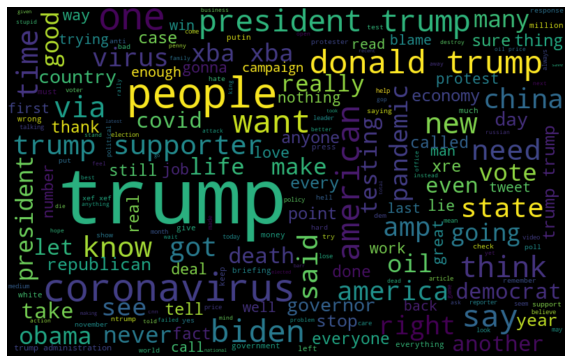

In [17]:
all_words = ' '.join([text for text in df['TWEET']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# NEGATIVE

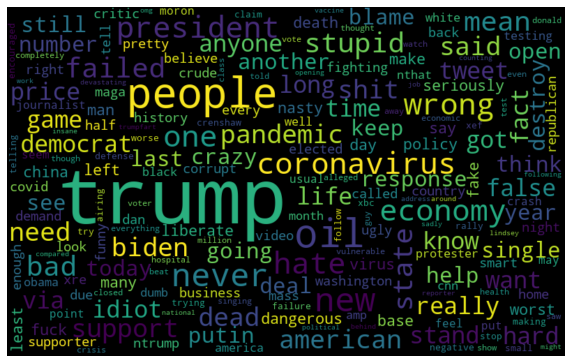

In [18]:
normal_words =' '.join([text for text in df['TWEET'][df['Label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# POSITIVE

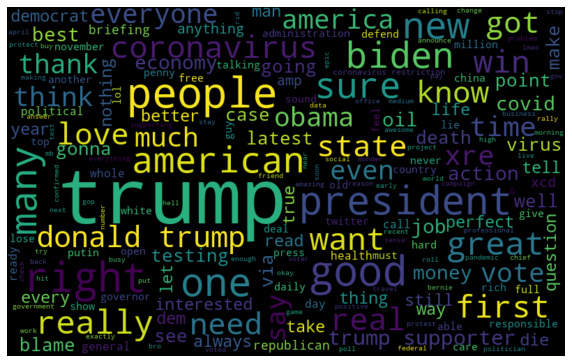

In [19]:
normal_words =' '.join([text for text in df['TWEET'][df['Label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# NEUTRAL

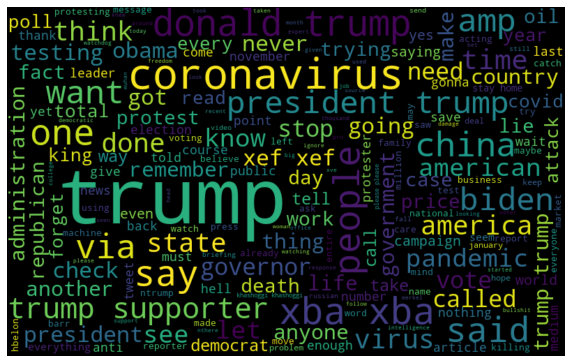

In [20]:
normal_words =' '.join([text for text in df['TWEET'][df['Label'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
train  = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.shape

(599, 5)

# Extracting Features from Cleaned Tweets

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

unable to import 'smart_open.gcs', disabling that module


# Bag-of-Words Features

In [23]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['TWEET'])
bow.shape

(999, 934)

# TF-IDF Features

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['TWEET'])
tfidf.shape

(999, 934)

In [25]:
tokenized_tweet = df['TWEET'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(df['TWEET']), epochs=20)

(99597, 156520)

# We will specify a word and the model will pull out the most similar words from the corpus.

In [26]:
model_w2v.wv.most_similar(positive="donald")

[('job', 0.9968999624252319),
 ('left', 0.9962135553359985),
 ('talking', 0.995866060256958),
 ('die', 0.9957228899002075),
 ('say', 0.9956903457641602),
 ('look', 0.9956320524215698),
 ('keep', 0.995545506477356),
 ('really', 0.9954278469085693),
 ('away', 0.9953941106796265),
 ('reporter', 0.995184063911438)]

In [27]:
model_w2v.wv['donald'] #numpy array of the vector

array([ 5.56641892e-02,  2.03493685e-01, -4.55879048e-02,  1.08844936e-01,
       -5.39814271e-02,  1.90049782e-01,  1.92262996e-02,  5.80701232e-02,
       -2.62848884e-02, -2.82332636e-02,  3.70519757e-02,  1.27948448e-02,
       -1.95846260e-02,  7.50385895e-02, -1.04376018e-01,  1.04589732e-02,
       -1.88819453e-01,  7.82858953e-02,  3.10217068e-02, -1.58266142e-01,
        1.02821440e-01, -9.31298360e-02, -6.35952652e-02,  6.33374974e-02,
        7.86018372e-02,  4.59031090e-02,  3.14968228e-02,  4.52067703e-02,
        4.16888632e-02,  1.48349538e-01,  1.59865245e-02, -1.69845358e-01,
        1.69444919e-01,  1.80577636e-02, -2.40379721e-01,  1.88062042e-01,
        4.99995127e-02, -1.36691093e-01,  8.22233856e-02,  1.07142188e-01,
        6.58957511e-02,  1.04918413e-01, -1.26474753e-01, -8.52072984e-02,
       -1.31342243e-02, -5.08222543e-02, -1.76219836e-01,  1.51301786e-01,
        1.04662232e-01,  3.15960422e-02,  7.93898925e-02, -3.82151492e-02,
       -3.53077725e-02,  

In [28]:
len(model_w2v.wv['trump'])

200

# We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [29]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [30]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(999, 200)

# Doc2Vec Embedding

In [31]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [32]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [33]:
labeled_tweets = add_label(tokenized_tweet) 

In [34]:
labeled_tweets

[TaggedDocument(words=['blame', 'pandemic', 'trump', 'however', 'thanks', 'trump', 'downplaying', 'vir'], tags=['tweet_0']),
 TaggedDocument(words=['bullshit', 'dan', 'lie', 'public', 'debunked', 'distilled'], tags=['tweet_1']),
 TaggedDocument(words=['thanks', 'like', 'donald', 'trump', 'given', 'money', 'one', 'unless', 'knew', 'would', 'get', 'back', 'return'], tags=['tweet_2']),
 TaggedDocument(words=['best', 'president', 'ever', 'trump', 'kag', 'xba'], tags=['tweet_3']),
 TaggedDocument(words=['bomb', 'hospital', 'school', 'wedding', 'funeral', 'middle', 'east', 'africa'], tags=['tweet_4']),
 TaggedDocument(words=[], tags=['tweet_5']),
 TaggedDocument(words=['know', 'response', 'trump', 'idiocy'], tags=['tweet_6']),
 TaggedDocument(words=['time', 'trump', 'resign', 'arrogance', 'mishandling', 'coronavirus', 'cost', 'life', 'brought'], tags=['tweet_7']),
 TaggedDocument(words=[], tags=['tweet_8']),
 TaggedDocument(words=['trump', 'running', 'around', 'wuhan', 'virus', 'asswipe'], t

In [35]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|███████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 1001220.95it/s]


In [36]:
model_d2v.train(labeled_tweets, total_examples= len(df['TWEET']), epochs=15)

In [37]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(df)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(999, 200)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Bag of words features

In [39]:
train_bow = bow[:599,:]
test_bow = bow[599:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [40]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >=0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.28888888888888886

In [41]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['Label'] = test_pred_int
print(test_pred_int)
submission = test[['Date','Polarity','Label']]
submission.to_csv('sub_lreg_bow.csv', index=False)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0]


In [42]:

train_tfidf = tfidf[:599,:]
test_tfidf = tfidf[599:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [43]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.3055555555555556

In [44]:
train_w2v = wordvec_df.iloc[:599,:]
test_w2v = wordvec_df.iloc[599:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [45]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy_score(yvalid, prediction_int)

0.2777777777777778

In [46]:
train_d2v = docvec_df.iloc[:599,:]
test_d2v = docvec_df.iloc[599:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [47]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy_score(yvalid, prediction_int)

0.25555555555555554

# SVM

In [48]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy_score(yvalid, prediction_int)

0.2611111111111111

In [49]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['Date','Polarity','label']]
submission.to_csv('sub_svc_bow.csv', index=False)

In [50]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy_score(yvalid, prediction_int)

0.2388888888888889

In [51]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy_score(yvalid, prediction_int)

0.2833333333333333

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
accuracy_score(yvalid, prediction)

0.3388888888888889

In [53]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['Date','Polarity','Label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [54]:
rf = RandomForestClassifier(n_estimators=200, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
accuracy_score(yvalid, prediction)

0.40555555555555556

In [55]:
rf = RandomForestClassifier(n_estimators=200, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
accuracy_score(yvalid, prediction)

0.37222222222222223

In [57]:
rf = RandomForestClassifier(n_estimators=200, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
accuracy_score(yvalid, prediction)

0.40555555555555556

# NAIVE BAYES 


In [58]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
from sklearn.metrics import accuracy_score
clf.fit(xtrain_tfidf,ytrain)
nb_pred=clf.predict(xvalid_tfidf)
accuracy_score(yvalid, nb_pred)

0.4388888888888889

In [59]:
from sklearn.naive_bayes import GaussianNB
wb_clf = GaussianNB()
wb_clf.fit(xtrain_w2v, ytrain)
wb_nb_pred=wb_clf.predict(xvalid_w2v)
accuracy_score(yvalid, wb_nb_pred)

0.2777777777777778

In [60]:
from sklearn.naive_bayes import GaussianNB
wb_clf = GaussianNB()
wb_clf.fit(xtrain_w2v, ytrain)
wb_nb_pred=wb_clf.predict(xvalid_d2v)
accuracy_score(yvalid, wb_nb_pred)

0.4444444444444444

In [61]:
clf = MultinomialNB()
clf.fit(xtrain_bow, ytrain)
yPredict = clf.predict(xvalid_bow)
accuracy_score(yvalid, yPredict)

0.4


# Classifiers - Naive Bayes, KNN, SVM Kernel

In [62]:
X=df[['Polarity']]
Y=df['Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)
X_train
import matplotlib.pyplot as plot # to plot charts
import pandas as pd # to import and manage dataset 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print ('---------------------------------------------------------------------------')
# Naive-Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train) 
# Predicting the Test set results
y_pred = nb.predict(X_test)
# Confusion-Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix of Naive Bayer -------")
print(cm)
print ('Accuracy Score :')
print(accuracy_score(y_test, y_pred) ) 
print ('Report : ')
print ( classification_report(y_test, y_pred) ) 

print ('---------------------------------------------------------------------------')
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix of KNN -------")
print(cm)
print ('Accuracy Score :')
print(accuracy_score(y_test, y_pred) ) 
print ('Report : ')
print ( classification_report(y_test, y_pred) ) 

print ('---------------------------------------------------------------------------')
# SVM classifier
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix of SVM -------")
print(cm)
print ('Accuracy Score :')
print(accuracy_score(y_test, y_pred) ) 
print ('Report : ')
print ( classification_report(y_test, y_pred) ) 

print ('---------------------------------------------------------------------------')
# Kernel SVM classifier
from sklearn.svm import SVC
ksvm = SVC(kernel='rbf', random_state=0)
ksvm.fit(X_train, y_train)
y_pred = ksvm.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix of Kernel SVM -------")
print(cm)
print ('Accuracy Score :')
print(accuracy_score(y_test, y_pred) ) 
print ('Report : ')
print ( classification_report(y_test, y_pred) ) 



---------------------------------------------------------------------------
Confusion matrix of Naive Bayer -------
[[ 65   3   0]
 [  0  96   0]
 [  0   0 136]]
Accuracy Score :
0.99
Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        68
           1       0.97      1.00      0.98        96
           2       1.00      1.00      1.00       136

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

---------------------------------------------------------------------------
Confusion matrix of KNN -------
[[ 66   0   2]
 [  0  95   1]
 [  0   0 136]]
Accuracy Score :
0.99
Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       1.00      0.99      0.99        96
           2       0.98      1.00      0.99       136

    accuracy         

# LOGISTIC REGRESSION FROM SCRATCH

In [63]:
X=df[['Polarity']]
Y=df['Label']
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import time
Labels = [0, 1, 2]
figs = []

for Label in Labels:
   figs.append(
       go.Box(
           y = df.loc[(df['Label']==Label),'Polarity'],
           name = Label
       )
   )
layout = go.Layout(
   title = "Polarity",
   xaxis = {"title" : "Label?"},
   yaxis = {"title" : "Polarity"},
   width=800,
   height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)


In [64]:
_=df.groupby('Label').size().reset_index()
# .sort_values(by='tenure', ascending=True)

data = [go.Bar(
   x = _['Label'].tolist(),
   y = _[0].tolist(),
   marker=dict(
       color=['rgba(255,190,134,1)', 'rgba(142,186,217,1)'])
)]
layout = go.Layout(
   title = "Label distribution",
   xaxis = {"title" : "Label"},
   width=800,
   height=500
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [65]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [66]:
def compute_cost(X, Y, theta):
    m = len(Y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-Y).T @ np.log(h + epsilon))-((1-Y).T @ np.log(1-h + epsilon)))
    return cost

In [67]:
def gradient_descent(X, Y, params, learning_rate, iterations):
    m = len(Y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - Y)) 
        cost_history[i] = compute_cost(X, Y, params)

    return (cost_history, params)

In [68]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [69]:
X, Y = make_classification(n_samples=599, n_features=1, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

Y = Y[:,np.newaxis]



Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.3106898 ]
 [ 2.11428226]] 



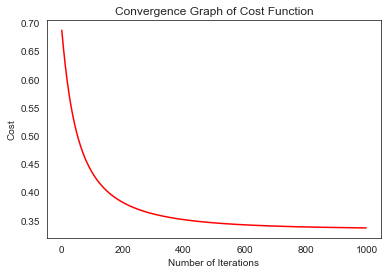

In [70]:
m = len(Y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1000
learning_rate = 0.03

initial_cost = compute_cost(X, Y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, Y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [71]:
Y_pred = predict(X, params_optimal)
score = float(sum(Y_pred == Y))/ float(len(Y))

print(score)

0.8647746243739566


# LOGISTIC REGRESSION WITH SKLEARN

In [72]:
X=df[['Polarity']]
Y=df['Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)
# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(fit_intercept=True, max_iter=10000)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Confusion-Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix of Naive Bayer -------")
print(cm)
print ('Accuracy Score :')
print(accuracy_score(y_test, y_pred) ) 
print ('Report : ')
print ( classification_report(y_test, y_pred) ) 


Confusion matrix of Naive Bayer -------
[[ 38   0  30]
 [  0  65  31]
 [  0   0 136]]
Accuracy Score :
0.7966666666666666
Report : 
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        68
           1       1.00      0.68      0.81        96
           2       0.69      1.00      0.82       136

    accuracy                           0.80       300
   macro avg       0.90      0.75      0.78       300
weighted avg       0.86      0.80      0.79       300



# NAIVE BAYES

In [73]:
data=pd.read_csv("Training.csv")
data=data.copy()

In [74]:
labels = [0,1,2]
for j in data.columns[:-1]:
    mean = data[j].mean()
    data[j] = data[j].replace(0,mean) #Replace 0 with mean
    data[j] = pd.cut(data[j],bins=len(labels),labels=labels)

In [75]:
data

Polarity  Label
0          2      1
1          1      2
2          1      0
3          1      2
4          1      2
..       ...    ...
994        1      1
995        1      1
996        0      0
997        1      2
998        1      1

[999 rows x 2 columns]

In [76]:
def count(data,colname,target):
    condition = (data[colname] == target)
    return len(data[condition])

In [77]:
train_percent = 75
train_len = int((train_percent*len(data))/100)
train_X = data.iloc[:train_len,:]
test_X = data.iloc[train_len:,:-1]
test_y = data.iloc[train_len:,-1:]

In [78]:
test_X['Pred'] = -1

In [79]:
probs = [round(count(train_X, 'Polarity', 0)/len(train_X), 2), round(count(train_X, 'Polarity', 1)/len(train_X), 2), round(count(train_X, 'Polarity', 2)/len(train_X), 2)]

In [80]:
out_probs = [round(count(train_X, 'Label', 0)/len(train_X), 2), round(count(train_X, 'Label', 1)/len(train_X), 2), round(count(train_X, 'Label', 2)/len(train_X), 2)]

In [81]:
zero_ct, one_ct, two_ct = count(train_X, 'Label', 0), count(train_X, 'Label', 1), count(train_X, 'Label', 2)

In [82]:
train_X

Polarity  Label
0          2      1
1          1      2
2          1      0
3          1      2
4          1      2
..       ...    ...
744        1      1
745        1      2
746        1      2
747        0      0
748        1      2

[749 rows x 2 columns]

In [83]:
test_X

Polarity  Pred
749        1    -1
750        2    -1
751        1    -1
752        1    -1
753        1    -1
..       ...   ...
994        1    -1
995        1    -1
996        0    -1
997        1    -1
998        1    -1

[250 rows x 2 columns]

In [84]:
test_y

Label
749      2
750      1
751      1
752      1
753      1
..     ...
994      1
995      1
996      0
997      2
998      1

[250 rows x 1 columns]

In [85]:
for index, row in test_X.iterrows():
    zero, one, two = 0, 0, 0
    for i, r in train_X.iterrows():
        if (r['Label'] == 0 and r['Polarity'] == row['Polarity']):
            zero += 1
        if (r['Label'] == 1 and r['Polarity'] == row['Polarity']):
            one += 1
        if (r['Label'] == 2 and r['Polarity'] == row['Polarity']):
            two += 1
    z = ((zero/zero_ct) * out_probs[0]) / probs[row['Polarity']]
    o = ((one/one_ct) * out_probs[1]) / probs[row['Polarity']]
    t = ((two/two_ct) * out_probs[2]) / probs[row['Polarity']]
    probabilities = {0: z, 1: o, 2: t}
    probabilities={k: v for k, v in sorted(probabilities.items(), key=lambda item: item[1])}
    keys = list(probabilities.keys())
    test_X.at[index, 'Pred'] = keys[-1]

In [86]:
expected_values = test_y.iloc[:, -1].tolist()

In [89]:
acc, j = 0, 0
for index, row in test_X.iterrows():
    if (row['Pred'] == expected_values[j]):
        acc += 1
    j+=1

In [92]:
print('Accuracy for training length '+str(train_percent)+'% : ', acc/len(test_y))

Accuracy for training length 75% :  0.668
